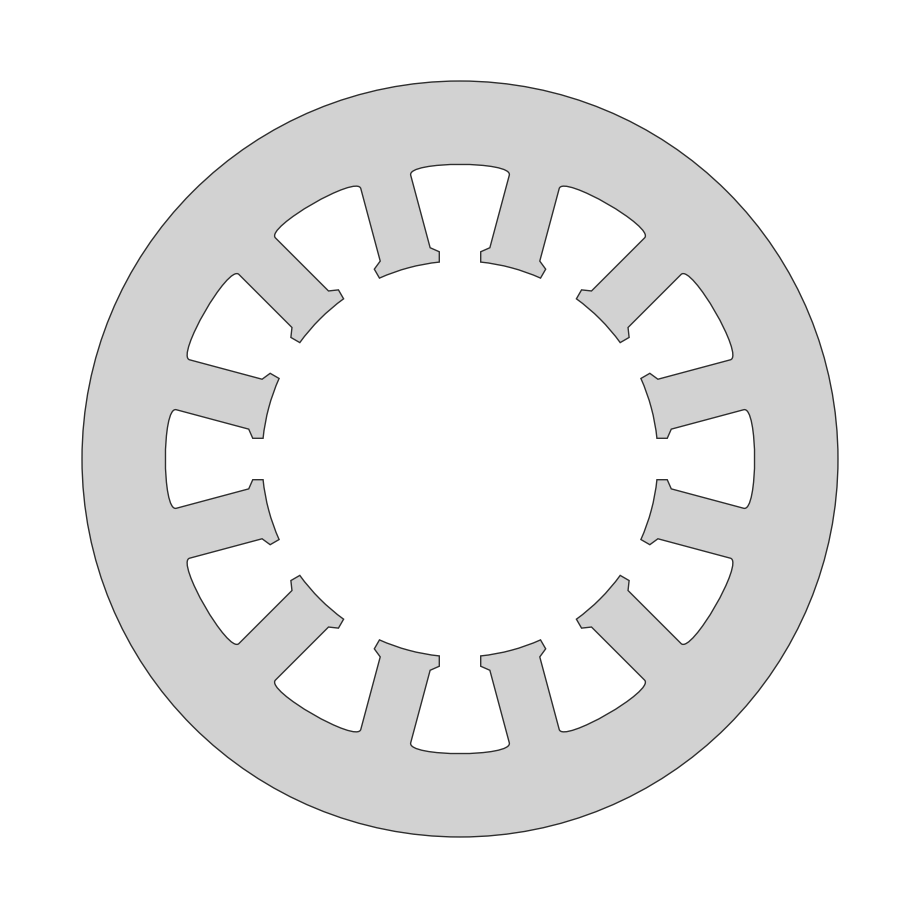

In [7]:
from os import linesep
import numpy as np
from numpy import linspace,cos,sin,pi,exp,angle,array,sqrt,arcsin,conj
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mp
from matplotlib.path import Path
from matplotlib.patches import PathPatch,Arc,Circle
from matplotlib import animation,transforms,colors
from matplotlib.backends.backend_pdf import PdfPages

plt.rcParams.update({'font.family':"sans serif",'animation.html':'jshtml',
                     'mathtext.fontset':'cm'})

def axis_reset(ax): #clear axis for redrawing
  xy=ax.axis(); ax.cla(); ax.axis('off'); ax.set(xlim=xy[:2],ylim=xy[-2:])
  return

def re_im(c):
  return list(zip(c.real,c.imag))


def r2d(rad):
  return rad*180/pi

def draw_stator(ax,ro,ri,ns,fc='w',ec='k',lw=1,alpha=1,theta=0):
  """ro: outer radius;  ri: inner radius; ns: number of slots"""
  # This draws a filled circle at the origin (0,0) with radius ro (outer radius of the stator).
  # fc sets the fill color, ec the edge color, lw the line width, and alpha the transparency.
  # stator's outer boundary, filled with a color from cs[15] (a light grayish tone) and a black edge.
  ax.add_patch(mp.Circle((0,0),ro,lw=lw,fc=fc,ec=ec,alpha=alpha))

  # v will store the vertices (points) of the stator's slots and inner arcs.
  # c will store the corresponding path codes (e.g., MOVETO, LINETO, CURVE4) that define how to connect the vertices.
  v,c=[],[]

  # Slot geometry
  tts = 2*pi/ns # tooth span in rad
  tsi = tts*.5 # slot span as a pctg of tooth span in rad, default: 50%
  # slot depth ds
  ds = (ro-ri)*.5
  tsp,tso = tsi*.8,tts-2*arcsin(ri*sin(.5*(tts-tsi))/(ri+ds)) # slot opening, slot bottom angle span
  tt = 2*ri*sin(.5*(tts-tsi)) # tooth thickness

  # Slot profile points
  xy1 = exp(-1j*tsp*.5)*ri+.2*tt
  xy2 = exp(-1j*tsi*.5)*ri+.3*tt*exp(-1j*tts/2)
  xy3 = exp(-1j*tso/2)*(ri+ds)
  xy = [xy1,xy2,xy3,xy3+.2*(xy3-xy2)] # splot profile points

  # conj(xy[::-1]) takes the complex conjugate, 
  # flipping the y-coordinates (imaginary parts) to mirror the points across the slot’s centerline
  # pts0 is the complete set of points for one slot (one side + mirrored side).
  pts0 = np.array(xy+list(conj(xy[::-1]))) #[xy,xy's reverse conjugate]

  # Loop through all stator slots
  for k in range(ns):
    pts = pts0*exp(1j*k*tts) # Rotates the slot profile by k * tts radians to position it at the correct angle for the k-th slot.
    v += re_im(pts) # Converts complex numbers to (x, y) coordinates for plotting.
    # Defines how to connect the slot points: straight lines for the first three points, 
    # a cubic Bezier curve for the next three (to smooth the outer edge), and straight lines again.
    c += [Path.LINETO]*3+[Path.CURVE4]*3+[Path.LINETO]*3

    # Creates an arc at the inner radius (ri) between slots, representing the inner edge of the stator between slot openings.
    ac = Path.arc(r2d(tts*k+.5*tsp),r2d(tts*(k+1)-.5*tsp))

    # v and c accumulate the vertices and path codes for all slots and inner arcs.
    v += list(ac.vertices*ri) #inner arc
    c += list(ac.codes[1:])

    tr = transforms.Affine2D().rotate(tts*k+theta)+ax.transData

  # Applies an optional rotation theta to the entire stator.
  tr = transforms.Affine2D().rotate(theta)+ax.transData
  # Creates a path starting at (0, 0), following the vertices v with codes c, and closing the path back to (0, 0)
  p = Path(v+[[0,0]],[Path.MOVETO]+c[1:]+[Path.CLOSEPOLY])
  # Draws the path with a white fill (fc='w') for the slots (cutting them out of the stator) and a black edge (ec).
  ax.add_patch(PathPatch(p,ec=colors.to_rgba(ec,alpha),fc='w',lw=lw,transform=tr))
  return




#parameters
Ns = 12 #number of slots
ph = 1 #number of phases
Nph = int(Ns/ph) #number of slots per phase
P = 4 #number of poles
Npph = int(Ns/(P*ph)) #number of slots per pole per phase
pp = int(Ns/P) #pole pitch
csp = int(pp-1) #coil span
cp = csp/pp #coil pitch
lcs = 2.5 #coil side length
x0,y0 = 0,-1.25 #origin for winding diagram

rso = 4.2 #stator outer radius
rsi = 2.2 #stator inner radius
xylim = [[-5,5] for _ in range(2)]
xlim1,ylim1 = [-.1,2.1],[-2.5,2.5]
ss = xlim1[1]/Ns #slot spacing in winding diagram
cs = list(mpl.cm.tab20.colors) + ['w','k'] #color sequence

fig = plt.figure(figsize=(9,16)) #portrait for animation
ar = 16/9 #aspect ratio
ax = fig.add_axes((0,0,1,1/ar),xlim=xylim[0],ylim=xylim[1],fc='none')
ax.axis('off')

draw_stator(ax,rso,rsi,Ns,fc=cs[15],alpha=.8,lw=1)





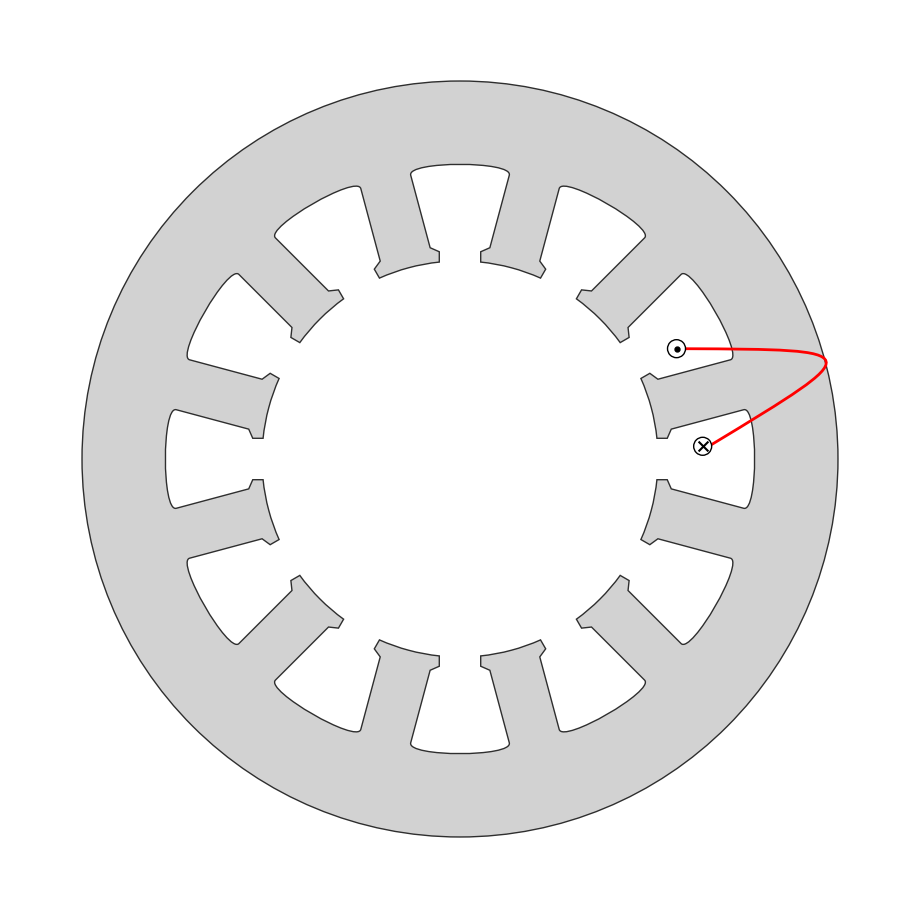

In [27]:
from os import linesep
import numpy as np
from numpy import linspace, cos, sin, pi, exp, angle, array, sqrt, arcsin, conj
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mp
from matplotlib.path import Path
from matplotlib.patches import PathPatch, Arc, Circle
from matplotlib import animation, transforms, colors
from matplotlib.backends.backend_pdf import PdfPages

plt.rcParams.update({'font.family': "sans serif", 'animation.html': 'jshtml', 'mathtext.fontset': 'cm'})

def axis_reset(ax):  # clear axis for redrawing
    xy = ax.axis()
    ax.cla()
    ax.axis('off')
    ax.set(xlim=xy[:2], ylim=xy[-2:])
    return

def re_im(c):
    return list(zip(c.real, c.imag))

def r2d(rad):
    return rad * 180 / pi

def draw_stator(ax, ro, ri, ns, fc='w', ec='k', lw=1, alpha=1, theta=0):
    """ro: outer radius; ri: inner radius; ns: number of slots"""
    ax.add_patch(mp.Circle((0, 0), ro, lw=lw, fc=fc, ec=ec, alpha=alpha))
    v, c = [], []
    tts = 2 * pi / ns
    tsi = tts * .5
    ds = (ro - ri) * .5
    tsp, tso = tsi * .8, tts - 2 * arcsin(ri * sin(.5 * (tts - tsi)) / (ri + ds))
    tt = 2 * ri * sin(.5 * (tts - tsi))
    xy1 = exp(-1j * tsp * .5) * ri + .2 * tt
    xy2 = exp(-1j * tsi * .5) * ri + .3 * tt * exp(-1j * tts / 2)
    xy3 = exp(-1j * tso / 2) * (ri + ds)
    xy = [xy1, xy2, xy3, xy3 + .2 * (xy3 - xy2)]
    pts0 = np.array(xy + list(conj(xy[::-1])))
    for k in range(ns):
        pts = pts0 * exp(1j * k * tts)
        v += re_im(pts)
        c += [Path.LINETO] * 3 + [Path.CURVE4] * 3 + [Path.LINETO] * 3
        ac = Path.arc(r2d(tts * k + .5 * tsp), r2d(tts * (k + 1) - .5 * tsp))
        v += list(ac.vertices * ri)
        c += list(ac.codes[1:])
        tr = transforms.Affine2D().rotate(tts * k + theta) + ax.transData
    tr = transforms.Affine2D().rotate(theta) + ax.transData
    p = Path(v + [[0, 0]], [Path.MOVETO] + c[1:] + [Path.CLOSEPOLY])
    ax.add_patch(PathPatch(p, ec=colors.to_rgba(ec, alpha), fc='w', lw=lw, transform=tr))
    return

def draw_end_turn(ax, ro, ri, ns, start_slot, end_slot, color='red', lw=2):
    """Draw a curve between the centers of two slots, arcing outside the stator.
    ro: outer radius; ri: inner radius; ns: number of slots;
    start_slot, end_slot: slot numbers (0 to ns-1) to draw the curve between."""
    # Calculate tooth span
    tts = 2 * pi / ns
    ds = (ro - ri) * .5  # slot depth

    # Calculate the center of the slots at radius ri + ds/2
    slot_radius = ri + ds / 2  # Middle of the slot depth
    start_angle = start_slot * tts
    end_angle = end_slot * tts

    # Offset the start point: 10% of slot width in the clockwise direction
    start_angle_offset = start_angle - tts * 0.1
    start_center = slot_radius * exp(1j * start_angle_offset)

    # Offset the end point: 10% of slot width in the counterclockwise direction
    end_angle_offset = end_angle + tts * 0.1
    end_center = slot_radius * exp(1j * end_angle_offset)

    # Control point to create an outward arc (beyond ro)
    mid_angle = (start_angle_offset + end_angle_offset) / 2
    control_radius = ro + 0.5  # Extend 0.5 units beyond the outer radius
    control_point = control_radius * exp(1j * mid_angle)

    # Adjust start and end points to lie on the circumference of the small circles
    circle_radius = 0.1  # Radius of the small circles

    # Direction at the start: from start_center to control_point
    start_direction = control_point - start_center
    start_direction_norm = start_direction / abs(start_direction)
    start_point = start_center + start_direction_norm * circle_radius

    # Direction at the end: from control_point to end_center
    end_direction = end_center + control_point
    end_direction_norm = end_direction / abs(end_direction)
    end_point = end_center + end_direction_norm * circle_radius

    # Create a Bezier curve for the arc
    vertices = [
        [start_point.real, start_point.imag],  # Adjusted start point
        [control_point.real, control_point.imag],  # Control point 1
        [control_point.real, control_point.imag],  # Control point 2
        [end_point.real, end_point.imag]  # Adjusted end point
    ]
    codes = [Path.MOVETO, Path.CURVE4, Path.CURVE4, Path.CURVE4]
    path = Path(vertices, codes)
    ax.add_patch(PathPatch(path, ec=color, fc='none', lw=lw, zorder=10))

    # Add a small circle with a dot at the start center
    ax.add_patch(mp.Circle((start_center.real, start_center.imag), radius=0.1, ec='black', fc='none', lw=1, zorder=12))
    ax.scatter(start_center.real, start_center.imag, color='black', marker='.', s=50, zorder=13)

    # Add a small circle with a cross at the end center
    ax.add_patch(mp.Circle((end_center.real, end_center.imag), radius=0.1, ec='black', fc='none', lw=1, zorder=12))
    ax.scatter(end_center.real, end_center.imag, color='black', marker='x', s=50, zorder=13)

# Parameters
Ns = 12
ph = 1
Nph = int(Ns / ph)
P = 4
Npph = int(Ns / (P * ph))
pp = int(Ns / P)
csp = int(pp - 1)
cp = csp / pp
lcs = 2.5
x0, y0 = 0, -1.25
rso = 4.2
rsi = 2.2
xylim = [[-5, 5] for _ in range(2)]
xlim1, ylim1 = [-.1, 2.1], [-2.5, 2.5]
ss = xlim1[1] / Ns
cs = list(mpl.cm.tab20.colors) + ['w', 'k']

fig = plt.figure(figsize=(9, 16))
ar = 16 / 9
ax = fig.add_axes((0, 0, 1, 1 / ar), xlim=xylim[0], ylim=xylim[1], fc='none')
ax.axis('off')

# Draw the stator
draw_stator(ax, rso, rsi, Ns, fc=cs[15], alpha=.8, lw=1)

# Draw the red curve from slot 0 to slot 1 with offset points
draw_end_turn(ax, rso, rsi, Ns, start_slot=1, end_slot=0)

# Save the plot
plt.savefig('stator_with_curve_at_circumference.png')

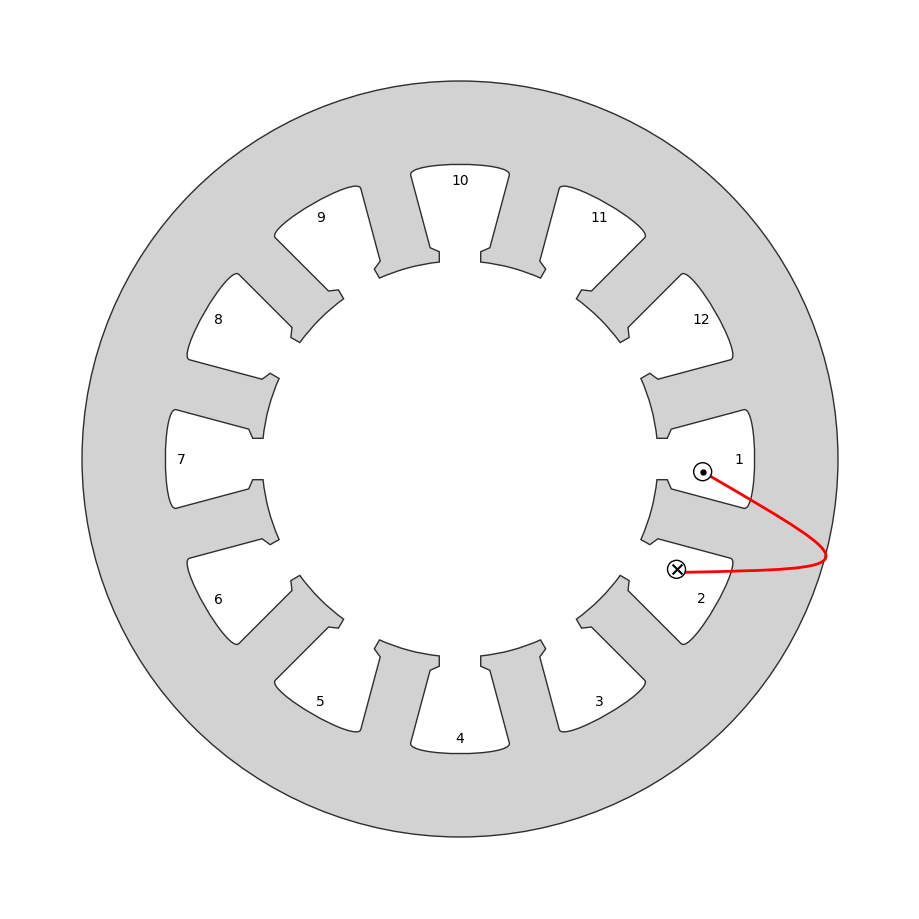

In [49]:
from os import linesep
import numpy as np
from numpy import linspace, cos, sin, pi, exp, angle, array, sqrt, arcsin, conj
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mp
from matplotlib.path import Path
from matplotlib.patches import PathPatch, Arc, Circle
from matplotlib import animation, transforms, colors
from matplotlib.backends.backend_pdf import PdfPages

plt.rcParams.update({'font.family': "sans serif", 'animation.html': 'jshtml', 'mathtext.fontset': 'cm'})

def axis_reset(ax):  # clear axis for redrawing
    xy = ax.axis()
    ax.cla()
    ax.axis('off')
    ax.set(xlim=xy[:2], ylim=xy[-2:])
    return

def re_im(c):
    return list(zip(c.real, c.imag))

def r2d(rad):
    return rad * 180 / pi

def draw_stator(ax, ro, ri, ns, fc='w', ec='k', lw=1, alpha=1, theta=0):
    """ro: outer radius; ri: inner radius; ns: number of slots"""
    ax.add_patch(mp.Circle((0, 0), ro, lw=lw, fc=fc, ec=ec, alpha=alpha))
    v, c = [], []
    tts = 2 * pi / ns
    tsi = tts * .5
    ds = (ro - ri) * .5
    tsp, tso = tsi * .8, tts - 2 * arcsin(ri * sin(.5 * (tts - tsi)) / (ri + ds))
    tt = 2 * ri * sin(.5 * (tts - tsi))
    xy1 = exp(-1j * tsp * .5) * ri + .2 * tt
    xy2 = exp(-1j * tsi * .5) * ri + .3 * tt * exp(-1j * tts / 2)
    xy3 = exp(-1j * tso / 2) * (ri + ds)
    xy = [xy1, xy2, xy3, xy3 + .2 * (xy3 - xy2)]
    pts0 = np.array(xy + list(conj(xy[::-1])))
    for k in range(ns):
        pts = pts0 * exp(1j * k * tts)
        v += re_im(pts)
        c += [Path.LINETO] * 3 + [Path.CURVE4] * 3 + [Path.LINETO] * 3
        ac = Path.arc(r2d(tts * k + .5 * tsp), r2d(tts * (k + 1) - .5 * tsp))
        v += list(ac.vertices * ri)
        c += list(ac.codes[1:])
        tr = transforms.Affine2D().rotate(tts * k + theta) + ax.transData
    tr = transforms.Affine2D().rotate(theta) + ax.transData
    p = Path(v + [[0, 0]], [Path.MOVETO] + c[1:] + [Path.CLOSEPOLY])
    ax.add_patch(PathPatch(p, ec=colors.to_rgba(ec, alpha), fc='w', lw=lw, transform=tr))
    return

def draw_end_turn(ax, ro, ri, ns, start_slot, end_slot, color='red', lw=2):
    """Draw a curve between the centers of two slots, arcing outside the stator.
    ro: outer radius; ri: inner radius; ns: number of slots;
    start_slot, end_slot: slot numbers (0 to ns-1) to draw the curve between."""
    tts = -2 * pi / ns
    ds = (ro - ri) * .5
    slot_radius = ri + ds / 2
    start_angle = start_slot * tts
    end_angle = end_slot * tts
    start_angle_offset = start_angle + tts * 0.1
    start_center = slot_radius * exp(1j * start_angle_offset)
    end_angle_offset = end_angle - tts * 0.1
    end_center = slot_radius * exp(1j * end_angle_offset)
    mid_angle = (start_angle_offset + end_angle_offset) / 2
    control_radius = ro + 0.5
    control_point = control_radius * exp(1j * mid_angle)
    circle_radius = 0.1
    start_direction = control_point - start_center
    start_direction_norm = start_direction / abs(start_direction)
    start_point = start_center + start_direction_norm * circle_radius
    end_direction = end_center + control_point
    end_direction_norm = end_direction / abs(end_direction)
    end_point = end_center + end_direction_norm * circle_radius
    vertices = [
        [start_point.real, start_point.imag],
        [control_point.real, control_point.imag],
        [control_point.real, control_point.imag],
        [end_point.real, end_point.imag]
    ]
    codes = [Path.MOVETO, Path.CURVE4, Path.CURVE4, Path.CURVE4]
    path = Path(vertices, codes)
    ax.add_patch(PathPatch(path, ec=color, fc='none', lw=lw, zorder=10))
    ax.add_patch(mp.Circle((start_center.real, start_center.imag), radius=0.1, ec='black', fc='none', lw=1, zorder=12))
    ax.scatter(start_center.real, start_center.imag, color='black', marker='.', s=50, zorder=13)
    ax.add_patch(mp.Circle((end_center.real, end_center.imag), radius=0.1, ec='black', fc='none', lw=1, zorder=12))
    ax.scatter(end_center.real, end_center.imag, color='black', marker='x', s=50, zorder=13)

def add_slot_numbers(ax, ro, ri, ns, font_size=10):
    """Add slot numbers to the stator in a clockwise direction.
    ro: outer radius; ri: inner radius; ns: number of slots."""
    tts = -2 * pi / ns  # Tooth span
    label_radius = ri + 0.45 * (ro - ri)  # Position just inside the inner radius

    for k in range(ns):
        angle = k * tts  # Angle of the k-th slot
        # Convert angle to degrees for text rotation
        angle_deg = r2d(angle)
        # Calculate the position of the label
        x = label_radius * cos(angle)
        y = label_radius * sin(angle)
        slot_number = k+1
        # Add the slot number with rotation to align radially
        ax.text(x, y, str(slot_number), fontsize=font_size, ha='center', va='center',
                zorder=15)

# Parameters
Ns = 12
ph = 1
Nph = int(Ns / ph)
P = 4
Npph = int(Ns / (P * ph))
pp = int(Ns / P)
csp = int(pp - 1)
cp = csp / pp
lcs = 2.5
x0, y0 = 0, -1.25
rso = 4.2
rsi = 2.2
xylim = [[-5, 5] for _ in range(2)]
xlim1, ylim1 = [-.1, 2.1], [-2.5, 2.5]
ss = xlim1[1] / Ns
cs = list(mpl.cm.tab20.colors) + ['w', 'k']

fig = plt.figure(figsize=(9, 16))
ar = 16 / 9
ax = fig.add_axes((0, 0, 1, 1 / ar), xlim=xylim[0], ylim=xylim[1], fc='none')
ax.axis('off')

# Draw the stator
draw_stator(ax, rso, rsi, Ns, fc=cs[15], alpha=.8, lw=1)

# Draw the red curve from slot 0 to slot 1 with offset points
draw_end_turn(ax, rso, rsi, Ns, start_slot=0, end_slot=1)

# Add slot numbers
add_slot_numbers(ax, rso, rsi, Ns)

# Save the plot
plt.savefig('stator_with_slot_numbers.png')

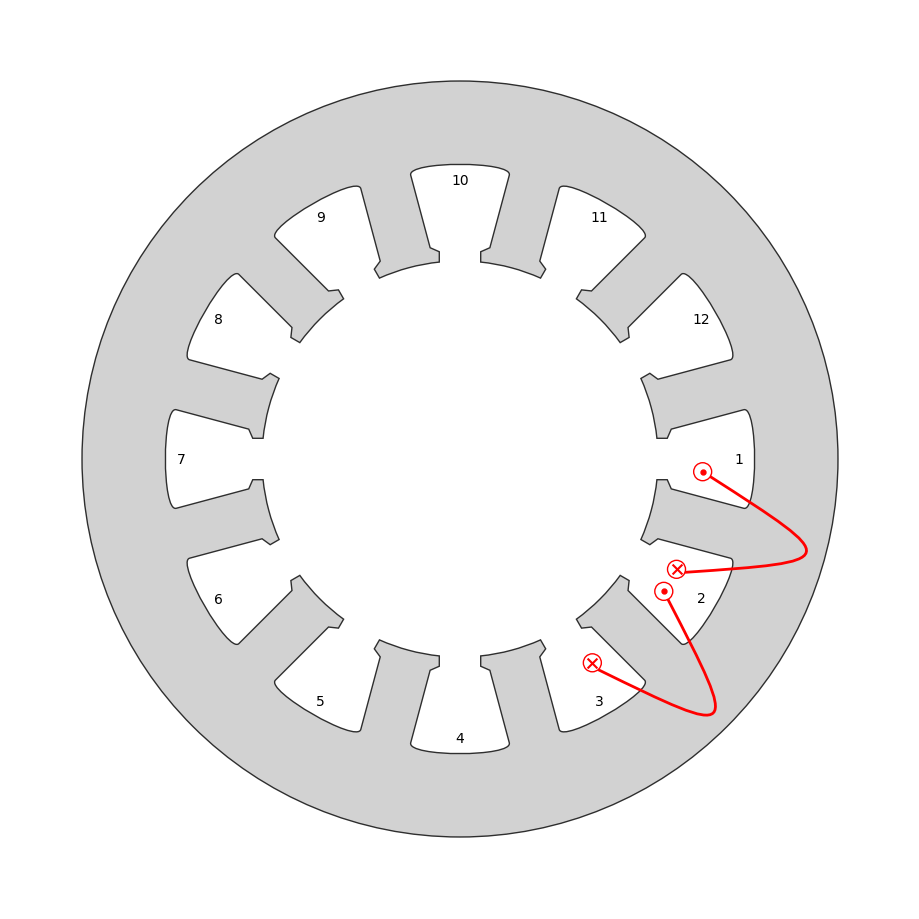

In [61]:
from os import linesep
import numpy as np
from numpy import linspace, cos, sin, pi, exp, angle, array, sqrt, arcsin, conj
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mp
from matplotlib.path import Path
from matplotlib.patches import PathPatch, Arc, Circle
from matplotlib import animation, transforms, colors
from matplotlib.backends.backend_pdf import PdfPages

# Update matplotlib settings for font and animation format
plt.rcParams.update({'font.family': "sans serif", 'animation.html': 'jshtml', 'mathtext.fontset': 'cm'})

def axis_reset(ax):  # Clear axis for redrawing
    xy = ax.axis()  # Store current axis limits
    ax.cla()  # Clear the axis
    ax.axis('off')  # Turn off axis lines and labels
    ax.set(xlim=xy[:2], ylim=xy[-2:])  # Restore the axis limits
    return

def re_im(c):  # Convert complex numbers to list of (real, imaginary) pairs
    return list(zip(c.real, c.imag))

def r2d(rad):  # Convert radians to degrees
    return rad * 180 / pi

def draw_stator(ax, ro, ri, ns, fc='w', ec='k', lw=1, alpha=1, theta=0):
    """Draw a stator with specified dimensions.
    ro: outer radius; ri: inner radius; ns: number of slots;
    fc: fill color; ec: edge color; lw: line width; alpha: transparency; theta: rotation angle"""
    ax.add_patch(mp.Circle((0, 0), ro, lw=lw, fc=fc, ec=ec, alpha=alpha))  # Draw the outer circle of the stator
    v, c = [], []  # Initialize lists for vertices and path codes
    tts = 2 * pi / ns  # Tooth span in radians (counterclockwise)
    tsi = tts * .5  # Slot span as a percentage of tooth span
    ds = (ro - ri) * .5  # Slot depth
    tsp, tso = tsi * .8, tts - 2 * arcsin(ri * sin(.5 * (tts - tsi)) / (ri + ds))  # Slot opening, slot bottom angle span
    tt = 2 * ri * sin(.5 * (tts - tsi))  # Tooth thickness
    # Define slot profile points using complex numbers
    xy1 = exp(-1j * tsp * .5) * ri + .2 * tt
    xy2 = exp(-1j * tsi * .5) * ri + .3 * tt * exp(-1j * tts / 2)
    xy3 = exp(-1j * tso / 2) * (ri + ds)
    xy = [xy1, xy2, xy3, xy3 + .2 * (xy3 - xy2)]  # Slot profile points
    pts0 = np.array(xy + list(conj(xy[::-1])))  # Mirror points to form full slot
    for k in range(ns):  # Loop through all slots
        pts = pts0 * exp(1j * k * tts)  # Rotate slot profile to position
        v += re_im(pts)  # Add vertices
        c += [Path.LINETO] * 3 + [Path.CURVE4] * 3 + [Path.LINETO] * 3  # Define path codes for slot shape
        ac = Path.arc(r2d(tts * k + .5 * tsp), r2d(tts * (k + 1) - .5 * tsp))  # Inner arc between slots
        v += list(ac.vertices * ri)  # Add arc vertices
        c += list(ac.codes[1:])  # Add arc path codes
        tr = transforms.Affine2D().rotate(tts * k + theta) + ax.transData  # Apply rotation transformation
    tr = transforms.Affine2D().rotate(theta) + ax.transData  # Apply overall rotation
    p = Path(v + [[0, 0]], [Path.MOVETO] + c[1:] + [Path.CLOSEPOLY])  # Create the final path
    ax.add_patch(PathPatch(p, ec=colors.to_rgba(ec, alpha), fc='w', lw=lw, transform=tr))  # Draw the stator
    return

def draw_end_turn(ax, ro, ri, ns, start_slot, end_slot, color='red', lw=2):
    """Draw a curve between the centers of two slots, arcing outside the stator.
    ro: outer radius; ri: inner radius; ns: number of slots;
    start_slot, end_slot: slot numbers (0 to ns-1) to draw the curve between."""
    tts = -2 * pi / ns  # Tooth span (clockwise for end turn)
    ds = (ro - ri) * .5  # Slot depth
    slot_radius = ri + ds / 2  # Radius at the middle of the slot
    start_angle = start_slot * tts  # Start angle for the first slot
    end_angle = end_slot * tts  # End angle for the second slot
    start_angle_offset = start_angle + tts * 0.1  # Offset start angle by 10% of slot width
    start_center = slot_radius * exp(1j * start_angle_offset)  # Start point at offset angle
    end_angle_offset = end_angle - tts * 0.1  # Offset end angle by 10% of slot width
    end_center = slot_radius * exp(1j * end_angle_offset)  # End point at offset angle
    mid_angle = (start_angle_offset + end_angle_offset) / 2  # Midpoint angle for control point
    control_radius = ro + 0.2  # Control point radius (outside stator)
    control_point = control_radius * exp(1j * mid_angle)  # Control point position
    circle_radius = 0.1  # Radius of small circles at start/end points
    start_direction = control_point - start_center  # Direction from start to control point
    start_direction_norm = start_direction / abs(start_direction)  # Normalize direction
    start_point = start_center + start_direction_norm * circle_radius  # Adjust start point to circle circumference
    end_direction = end_center + control_point  # Incorrect direction (should be end_center - control_point)
    end_direction_norm = end_direction / abs(end_direction)  # Normalize direction
    end_point = end_center + end_direction_norm * circle_radius  # Adjust end point to circle circumference
    vertices = [  # Define Bezier curve vertices
        [start_point.real, start_point.imag],
        [control_point.real, control_point.imag],
        [control_point.real, control_point.imag],
        [end_point.real, end_point.imag]
    ]
    codes = [Path.MOVETO, Path.CURVE4, Path.CURVE4, Path.CURVE4]  # Bezier curve path codes
    path = Path(vertices, codes)  # Create the Bezier curve path
    ax.add_patch(PathPatch(path, ec=color, fc='none', lw=lw, zorder=10))  # Draw the curve
    ax.add_patch(mp.Circle((start_center.real, start_center.imag), radius=0.1, ec='red', fc='none', lw=1, zorder=12))  # Draw circle at start point
    ax.scatter(start_center.real, start_center.imag, color='red', marker='.', s=50, zorder=13)  # Add dot in start circle
    ax.add_patch(mp.Circle((end_center.real, end_center.imag), radius=0.1, ec='red', fc='none', lw=1, zorder=12))  # Draw circle at end point
    ax.scatter(end_center.real, end_center.imag, color='red', marker='x', s=50, zorder=13)  # Add cross in end circle

def add_slot_numbers(ax, ro, ri, ns, font_size=10):
    """Add slot numbers to the stator in a clockwise direction.
    ro: outer radius; ri: inner radius; ns: number of slots."""
    tts = -2 * pi / ns  # Tooth span (clockwise for numbering)
    label_radius = ri + 0.45 * (ro - ri)  # Position closer to the slots
    for k in range(ns):
        angle = k * tts   # Angle of the k-th slot
        angle_deg = r2d(angle)  # Convert angle to degrees for text rotation
        x = label_radius * cos(angle)  # X-coordinate of label
        y = label_radius * sin(angle)  # Y-coordinate of label
        slot_number = k + 1  # Start numbering at 1
        ax.text(x, y, str(slot_number), fontsize=font_size, ha='center', va='center', zorder=15)  # Add the slot number

# Parameters for the stator and plot
Ns = 12  # Number of slots
ph = 1  # Number of phases
Nph = int(Ns / ph)  # Number of slots per phase
P = 4  # Number of poles
Npph = int(Ns / (P * ph))  # Number of slots per pole per phase
pp = int(Ns / P)  # Pole pitch
csp = int(pp - 1)  # Coil span
cp = csp / pp  # Coil pitch
lcs = 2.5  # Coil side length
x0, y0 = 0, -1.25  # Origin for winding diagram
rso = 4.2  # Stator outer radius
rsi = 2.2  # Stator inner radius
xylim = [[-5, 5] for _ in range(2)]  # Axis limits
xlim1, ylim1 = [-.1, 2.1], [-2.5, 2.5]  # Additional axis limits
ss = xlim1[1] / Ns  # Slot spacing in winding diagram
cs = list(mpl.cm.tab20.colors) + ['w', 'k']  # Color sequence

# Set up the figure and axis
fig = plt.figure(figsize=(9, 16))  # Portrait orientation for animation
ar = 16 / 9  # Aspect ratio
ax = fig.add_axes((0, 0, 1, 1 / ar), xlim=xylim[0], ylim=xylim[1], fc='none')  # Add axis with specified limits
ax.axis('off')  # Turn off axis lines and labels

# Draw the stator
draw_stator(ax, rso, rsi, Ns, fc=cs[15], alpha=.8, lw=1)

# Draw the red curve from slot 0 to slot 1 with offset points
draw_end_turn(ax, rso, rsi, Ns, start_slot=0, end_slot=1)

# Draw the red curve from slot 0 to slot 1 with offset points
draw_end_turn(ax, rso, rsi, Ns, start_slot=1, end_slot=2)
# Add slot numbers
add_slot_numbers(ax, rso, rsi, Ns)

# Save the plot to a file
plt.savefig('stator_with_slot_numbers.png')

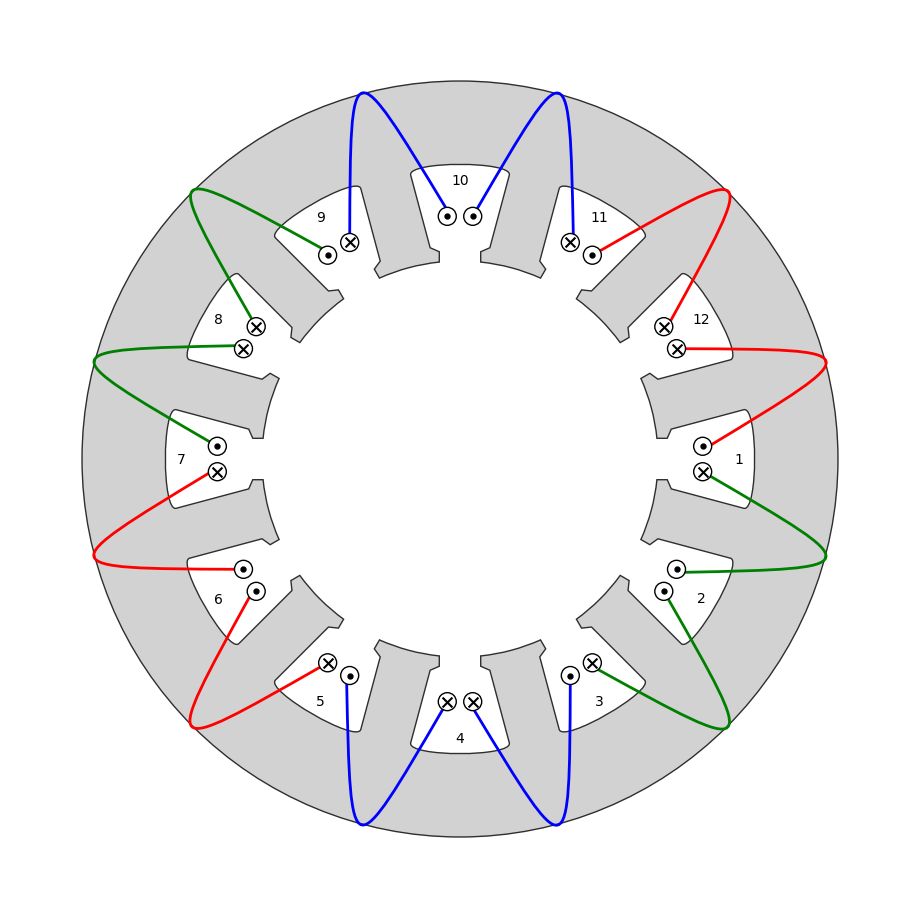

In [79]:
from os import linesep
import numpy as np
from numpy import linspace, cos, sin, pi, exp, angle, array, sqrt, arcsin, conj
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mp
from matplotlib.path import Path
from matplotlib.patches import PathPatch, Arc, Circle
from matplotlib import animation, transforms, colors
from matplotlib.backends.backend_pdf import PdfPages

# Update matplotlib settings for font and animation format
plt.rcParams.update({'font.family': "sans serif", 'animation.html': 'jshtml', 'mathtext.fontset': 'cm'})

def axis_reset(ax):  # Clear axis for redrawing
    xy = ax.axis()  # Store current axis limits
    ax.cla()  # Clear the axis
    ax.axis('off')  # Turn off axis lines and labels
    ax.set(xlim=xy[:2], ylim=xy[-2:])  # Restore the axis limits
    return

def re_im(c):  # Convert complex numbers to list of (real, imaginary) pairs
    return list(zip(c.real, c.imag))

def r2d(rad):  # Convert radians to degrees
    return rad * 180 / pi

def draw_stator(ax, ro, ri, ns, fc='w', ec='k', lw=1, alpha=1, theta=0):
    """Draw a stator with specified dimensions.
    ro: outer radius; ri: inner radius; ns: number of slots;
    fc: fill color; ec: edge color; lw: line width; alpha: transparency; theta: rotation angle"""
    ax.add_patch(mp.Circle((0, 0), ro, lw=lw, fc=fc, ec=ec, alpha=alpha))  # Draw the outer circle of the stator
    v, c = [], []  # Initialize lists for vertices and path codes
    tts = 2 * pi / ns  # Tooth span in radians (counterclockwise)
    tsi = tts * .5  # Slot span as a percentage of tooth span
    ds = (ro - ri) * .5  # Slot depth
    tsp, tso = tsi * .8, tts - 2 * arcsin(ri * sin(.5 * (tts - tsi)) / (ri + ds))  # Slot opening, slot bottom angle span
    tt = 2 * ri * sin(.5 * (tts - tsi))  # Tooth thickness
    # Define slot profile points using complex numbers
    xy1 = exp(-1j * tsp * .5) * ri + .2 * tt
    xy2 = exp(-1j * tsi * .5) * ri + .3 * tt * exp(-1j * tts / 2)
    xy3 = exp(-1j * tso / 2) * (ri + ds)
    xy = [xy1, xy2, xy3, xy3 + .2 * (xy3 - xy2)]  # Slot profile points
    pts0 = np.array(xy + list(conj(xy[::-1])))  # Mirror points to form full slot
    for k in range(ns):  # Loop through all slots
        pts = pts0 * exp(1j * k * tts)  # Rotate slot profile to position
        v += re_im(pts)  # Add vertices
        c += [Path.LINETO] * 3 + [Path.CURVE4] * 3 + [Path.LINETO] * 3  # Define path codes for slot shape
        ac = Path.arc(r2d(tts * k + .5 * tsp), r2d(tts * (k + 1) - .5 * tsp))  # Inner arc between slots
        v += list(ac.vertices * ri)  # Add arc vertices
        c += list(ac.codes[1:])  # Add arc path codes
        tr = transforms.Affine2D().rotate(tts * k + theta) + ax.transData  # Apply rotation transformation
    tr = transforms.Affine2D().rotate(theta) + ax.transData  # Apply overall rotation
    p = Path(v + [[0, 0]], [Path.MOVETO] + c[1:] + [Path.CLOSEPOLY])  # Create the final path
    ax.add_patch(PathPatch(p, ec=colors.to_rgba(ec, alpha), fc='w', lw=lw, transform=tr))  # Draw the stator
    return

def draw_end_turn(ax, ro, ri, ns, start_slot, end_slot, start_dir='pos', end_dir='neg', color='red', lw=2):
    """Draw a curve between the centers of two slots, arcing outside the stator.
    ro: outer radius; ri: inner radius; ns: number of slots;
    start_slot, end_slot: slot numbers (0 to ns-1) to draw the curve between;
    start_dir, end_dir: 'pos' for dot marker, 'neg' for cross marker;
    color: curve color; lw: line width."""
    tts = -2 * pi / ns  # Tooth span (clockwise for end turn)
    ds = (ro - ri) * .5  # Slot depth
    slot_radius = ri + ds / 2  # Radius at the middle of the slot
    start_angle = start_slot * tts  # Start angle for the first slot
    end_angle = end_slot * tts  # End angle for the second slot
    start_angle_offset = start_angle + tts * 0.1  # Offset start angle by 10% of slot width
    start_center = slot_radius * exp(1j * start_angle_offset)  # Start point at offset angle
    end_angle_offset = end_angle - tts * 0.1  # Offset end angle by 10% of slot width
    end_center = slot_radius * exp(1j * end_angle_offset)  # End point at offset angle
    mid_angle = (start_angle_offset + end_angle_offset) / 2  # Midpoint angle for control point
    control_radius = ro + 0.5  # Control point radius (outside stator)
    control_point = control_radius * exp(1j * mid_angle)  # Control point position
    circle_radius = 0.1  # Radius of small circles at start/end points
    start_direction = control_point - start_center  # Direction from start to control point
    start_direction_norm = start_direction / abs(start_direction)  # Normalize direction
    start_point = start_center + start_direction_norm * circle_radius  # Adjust start point to circle circumference
    end_direction = end_center + control_point  # Corrected direction: from control point to end center
    end_direction_norm = end_direction / abs(end_direction)  # Normalize direction
    end_point = end_center + end_direction_norm * circle_radius  # Adjust end point to circle circumference
    vertices = [  # Define Bezier curve vertices
        [start_point.real, start_point.imag],
        [control_point.real, control_point.imag],
        [control_point.real, control_point.imag],
        [end_point.real, end_point.imag]
    ]
    codes = [Path.MOVETO, Path.CURVE4, Path.CURVE4, Path.CURVE4]  # Bezier curve path codes
    path = Path(vertices, codes)  # Create the Bezier curve path
    ax.add_patch(PathPatch(path, ec=color, fc='none', lw=lw, zorder=10))  # Draw the curve
    # Draw circle at start point with marker based on start_dir
    ax.add_patch(mp.Circle((start_center.real, start_center.imag), radius=0.1, ec='black', fc='none', lw=1, zorder=12))
    start_marker = '.' if start_dir == 'pos' else 'x'  # Dot for 'pos', cross for 'neg'
    ax.scatter(start_center.real, start_center.imag, color='black', marker=start_marker, s=50, zorder=13)
    # Draw circle at end point with marker based on end_dir
    ax.add_patch(mp.Circle((end_center.real, end_center.imag), radius=0.1, ec='black', fc='none', lw=1, zorder=12))
    end_marker = '.' if end_dir == 'pos' else 'x'  # Dot for 'pos', cross for 'neg'
    ax.scatter(end_center.real, end_center.imag, color='black', marker=end_marker, s=50, zorder=13)

def add_slot_numbers(ax, ro, ri, ns, font_size=10):
    """Add slot numbers to the stator in a clockwise direction.
    ro: outer radius; ri: inner radius; ns: number of slots."""
    tts = -2 * pi / ns  # Tooth span
    label_radius = ri + 0.45 * (ro - ri)  # Position just inside the inner radius
    for k in range(ns):
        angle = k * tts  # Angle of the k-th slot
        # Convert angle to degrees for text rotation
        angle_deg = r2d(angle)
        # Calculate the position of the label
        x = label_radius * cos(angle)
        y = label_radius * sin(angle)
        slot_number = k + 1  # Start numbering at 1
        # Add the slot number with rotation to align radially
        ax.text(x, y, str(slot_number), fontsize=font_size, ha='center', va='center', zorder=15)

# Parameters for the stator and plot
Ns = 12  # Number of slots
ph = 1  # Number of phases
Nph = int(Ns / ph)  # Number of slots per phase
P = 4  # Number of poles
Npph = int(Ns / (P * ph))  # Number of slots per pole per phase
pp = int(Ns / P)  # Pole pitch
csp = int(pp - 1)  # Coil span
cp = csp / pp  # Coil pitch
lcs = 2.5  # Coil side length
x0, y0 = 0, -1.25  # Origin for winding diagram
rso = 4.2  # Stator outer radius
rsi = 2.2  # Stator inner radius
xylim = [[-5, 5] for _ in range(2)]  # Axis limits
xlim1, ylim1 = [-.1, 2.1], [-2.5, 2.5]  # Additional axis limits
ss = xlim1[1] / Ns  # Slot spacing in winding diagram
cs = list(mpl.cm.tab20.colors) + ['w', 'k']  # Color sequence

# Set up the figure and axis
fig = plt.figure(figsize=(9, 16))  # Portrait orientation for animation
ar = 16 / 9  # Aspect ratio
ax = fig.add_axes((0, 0, 1, 1 / ar), xlim=xylim[0], ylim=xylim[1], fc='none')  # Add axis with specified limits
ax.axis('off')  # Turn off axis lines and labels

# Draw the stator
draw_stator(ax, rso, rsi, Ns, fc=cs[15], alpha=.8, lw=1)

# Draw the red curve from slot 0 to slot 1 with offset points
# Phase U plotting
draw_end_turn(ax, rso, rsi, Ns, start_slot=0, end_slot=1, start_dir='neg', end_dir='pos', color='green')

draw_end_turn(ax, rso, rsi, Ns, start_slot=1, end_slot=2, start_dir='pos', end_dir='neg', color='green')

draw_end_turn(ax, rso, rsi, Ns, start_slot=6, end_slot=7, start_dir='pos', end_dir='neg', color='green')

draw_end_turn(ax, rso, rsi, Ns, start_slot=7, end_slot=8, start_dir='neg', end_dir='pos', color='green')


# Phase W plotting
draw_end_turn(ax, rso, rsi, Ns, start_slot=2, end_slot=3, start_dir='pos', end_dir='neg', color='blue')

draw_end_turn(ax, rso, rsi, Ns, start_slot=3, end_slot=4, start_dir='neg', end_dir='pos', color='blue')

draw_end_turn(ax, rso, rsi, Ns, start_slot=8, end_slot=9, start_dir='neg', end_dir='pos', color='blue')

draw_end_turn(ax, rso, rsi, Ns, start_slot=9, end_slot=10, start_dir='pos', end_dir='neg', color='blue')

# Phase V plotting
draw_end_turn(ax, rso, rsi, Ns, start_slot=4, end_slot=5, start_dir='neg', end_dir='pos', color='red')

draw_end_turn(ax, rso, rsi, Ns, start_slot=5, end_slot=6, start_dir='pos', end_dir='neg', color='red')

draw_end_turn(ax, rso, rsi, Ns, start_slot=10, end_slot=11, start_dir='pos', end_dir='neg', color='red')

draw_end_turn(ax, rso, rsi, Ns, start_slot=11, end_slot=12, start_dir='neg', end_dir='pos', color='red')



# Add slot numbers
add_slot_numbers(ax, rso, rsi, Ns)

# Save the plot to a file
plt.savefig('stator_with_slot_numbers.png')

In [ ]:
from os import linesep
import numpy as np
from numpy import linspace, cos, sin, pi, exp, angle, array, sqrt, arcsin, conj
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mp
from matplotlib.path import Path
from matplotlib.patches import PathPatch, Arc, Circle
from matplotlib import animation, transforms, colors
from matplotlib.backends.backend_pdf import PdfPages

# Update matplotlib settings for font and animation format
plt.rcParams.update({'font.family': "sans serif", 'animation.html': 'jshtml', 'mathtext.fontset': 'cm'})

def axis_reset(ax):  # Clear axis for redrawing
    xy = ax.axis()  # Store current axis limits
    ax.cla()  # Clear the axis
    ax.axis('off')  # Turn off axis lines and labels
    ax.set(xlim=xy[:2], ylim=xy[-2:])  # Restore the axis limits
    return

def re_im(c):  # Convert complex numbers to list of (real, imaginary) pairs
    return list(zip(c.real, c.imag))

def r2d(rad):  # Convert radians to degrees
    return rad * 180 / pi

def draw_stator(ax, ro, ri, ns, fc='w', ec='k', lw=1, alpha=1, theta=0):
    """Draw a stator with specified dimensions.
    ro: outer radius; ri: inner radius; ns: number of slots;
    fc: fill color; ec: edge color; lw: line width; alpha: transparency; theta: rotation angle"""
    ax.add_patch(mp.Circle((0, 0), ro, lw=lw, fc=fc, ec=ec, alpha=alpha))  # Draw the outer circle of the stator
    v, c = [], []  # Initialize lists for vertices and path codes
    tts = 2 * pi / ns  # Tooth span in radians (counterclockwise)
    tsi = tts * .5  # Slot span as a percentage of tooth span
    ds = (ro - ri) * .5  # Slot depth
    tsp, tso = tsi * .8, tts - 2 * arcsin(ri * sin(.5 * (tts - tsi)) / (ri + ds))  # Slot opening, slot bottom angle span
    tt = 2 * ri * sin(.5 * (tts - tsi))  # Tooth thickness
    # Define slot profile points using complex numbers
    xy1 = exp(-1j * tsp * .5) * ri + .2 * tt
    xy2 = exp(-1j * tsi * .5) * ri + .3 * tt * exp(-1j * tts / 2)
    xy3 = exp(-1j * tso / 2) * (ri + ds)
    xy = [xy1, xy2, xy3, xy3 + .2 * (xy3 - xy2)]  # Slot profile points
    pts0 = np.array(xy + list(conj(xy[::-1])))  # Mirror points to form full slot
    for k in range(ns):  # Loop through all slots
        pts = pts0 * exp(1j * k * tts)  # Rotate slot profile to position
        v += re_im(pts)  # Add vertices
        c += [Path.LINETO] * 3 + [Path.CURVE4] * 3 + [Path.LINETO] * 3  # Define path codes for slot shape
        ac = Path.arc(r2d(tts * k + .5 * tsp), r2d(tts * (k + 1) - .5 * tsp))  # Inner arc between slots
        v += list(ac.vertices * ri)  # Add arc vertices
        c += list(ac.codes[1:])  # Add arc path codes
        tr = transforms.Affine2D().rotate(tts * k + theta) + ax.transData  # Apply rotation transformation
    tr = transforms.Affine2D().rotate(theta) + ax.transData  # Apply overall rotation
    p = Path(v + [[0, 0]], [Path.MOVETO] + c[1:] + [Path.CLOSEPOLY])  # Create the final path
    ax.add_patch(PathPatch(p, ec=colors.to_rgba(ec, alpha), fc='w', lw=lw, transform=tr))  # Draw the stator
    return

def draw_end_turn(ax, ro, ri, ns, start_slot, end_slot, start_dir='pos', end_dir='neg', color='red', lw=2):
    """Draw a curve between the centers of two slots, arcing outside the stator.
    ro: outer radius; ri: inner radius; ns: number of slots;
    start_slot, end_slot: slot numbers (0 to ns-1) to draw the curve between;
    start_dir, end_dir: 'pos' for dot marker, 'neg' for cross marker;
    color: curve color; lw: line width."""
    tts = -2 * pi / ns  # Tooth span (clockwise for end turn)
    ds = (ro - ri) * .5  # Slot depth
    slot_radius = ri + ds / 2  # Radius at the middle of the slot
    start_angle = start_slot * tts  # Start angle for the first slot
    end_angle = end_slot * tts  # End angle for the second slot
    start_angle_offset = start_angle + tts * 0.1  # Offset start angle by 10% of slot width
    start_center = slot_radius * exp(1j * start_angle_offset)  # Start point at offset angle
    end_angle_offset = end_angle - tts * 0.1  # Offset end angle by 10% of slot width
    end_center = slot_radius * exp(1j * end_angle_offset)  # End point at offset angle
    mid_angle = (start_angle_offset + end_angle_offset) / 2  # Midpoint angle for control point
    control_radius = ro + 0.5  # Control point radius (outside stator)
    control_point = control_radius * exp(1j * mid_angle)  # Control point position
    circle_radius = 0.1  # Radius of small circles at start/end points
    start_direction = control_point - start_center  # Direction from start to control point
    start_direction_norm = start_direction / abs(start_direction)  # Normalize direction
    start_point = start_center + start_direction_norm * circle_radius  # Adjust start point to circle circumference
    end_direction = end_center + control_point  # Incorrect direction (should be end_center - control_point)
    end_direction_norm = end_direction / abs(end_direction)  # Normalize direction
    end_point = end_center + end_direction_norm * circle_radius  # Adjust end point to circle circumference
    vertices = [  # Define Bezier curve vertices
        [start_point.real, start_point.imag],
        [control_point.real, control_point.imag],
        [control_point.real, control_point.imag],
        [end_point.real, end_point.imag]
    ]
    codes = [Path.MOVETO, Path.CURVE4, Path.CURVE4, Path.CURVE4]  # Bezier curve path codes
    path = Path(vertices, codes)  # Create the Bezier curve path
    ax.add_patch(PathPatch(path, ec=color, fc='none', lw=lw, zorder=10))  # Draw the curve
    # Draw circle at start point with marker based on start_dir
    ax.add_patch(mp.Circle((start_center.real, start_center.imag), radius=0.1, ec='black', fc='none', lw=1, zorder=12))
    start_marker = '.' if start_dir == 'pos' else 'x'  # Dot for 'pos', cross for 'neg'
    ax.scatter(start_center.real, start_center.imag, color='black', marker=start_marker, s=50, zorder=13)
    # Draw circle at end point with marker based on end_dir
    ax.add_patch(mp.Circle((end_center.real, end_center.imag), radius=0.1, ec='black', fc='none', lw=1, zorder=12))
    end_marker = '.' if end_dir == 'pos' else 'x'  # Dot for 'pos', cross for 'neg'
    ax.scatter(end_center.real, end_center.imag, color='black', marker=end_marker, s=50, zorder=13)

def add_slot_numbers(ax, ro, ri, ns, font_size=10):
    """Add slot numbers to the stator in a clockwise direction.
    ro: outer radius; ri: inner radius; ns: number of slots."""
    tts = -2 * pi / ns  # Tooth span
    label_radius = ri + 0.45 * (ro - ri)  # Position just inside the inner radius
    for k in range(ns):
        angle = k * tts  # Angle of the k-th slot
        # Convert angle to degrees for text rotation
        angle_deg = r2d(angle)
        # Calculate the position of the label
        x = label_radius * cos(angle)
        y = label_radius * sin(angle)
        slot_number = k + 1  # Start numbering at 1
        # Add the slot number with rotation to align radially
        ax.text(x, y, str(slot_number), fontsize=font_size, ha='center', va='center', zorder=15)

# Parameters for the stator and plot
Ns = 12  # Number of slots
ph = 1  # Number of phases
Nph = int(Ns / ph)  # Number of slots per phase
P = 4  # Number of poles
Npph = int(Ns / (P * ph))  # Number of slots per pole per phase
pp = int(Ns / P)  # Pole pitch
csp = int(pp - 1)  # Coil span
cp = csp / pp  # Coil pitch
lcs = 2.5  # Coil side length
x0, y0 = 0, -1.25  # Origin for winding diagram
rso = 4.2  # Stator outer radius
rsi = 2.2  # Stator inner radius
xylim = [[-5, 5] for _ in range(2)]  # Axis limits
xlim1, ylim1 = [-.1, 2.1], [-2.5, 2.5]  # Additional axis limits
ss = xlim1[1] / Ns  # Slot spacing in winding diagram
cs = list(mpl.cm.tab20.colors) + ['w', 'k']  # Color sequence

# Set up the figure and axis
fig = plt.figure(figsize=(9, 9))  # Portrait orientation for animation
ar = 12 / 9  # Aspect ratio
ax = fig.add_axes((0, 0, 1, 1 / ar), xlim=xylim[0], ylim=xylim[1], fc='none')  # Add axis with specified limits
ax.axis('off')  # Turn off axis lines and labels

# Define the drawing steps
steps = [
    ('stator', lambda: draw_stator(ax, rso, rsi, Ns, fc=cs[15], alpha=.8, lw=1)),  # Step 1: Draw the stator
    ('slot_numbers', lambda: add_slot_numbers(ax, rso, rsi, Ns)),  # Add slot numbers
    # Phase U plotting
    ('end_turn', lambda: draw_end_turn(ax, rso, rsi, Ns, start_slot=0, end_slot=1, start_dir='neg', end_dir='pos', color='green')),
    ('end_turn', lambda: draw_end_turn(ax, rso, rsi, Ns, start_slot=1, end_slot=2, start_dir='pos', end_dir='neg', color='green')),
    ('end_turn', lambda: draw_end_turn(ax, rso, rsi, Ns, start_slot=6, end_slot=7, start_dir='pos', end_dir='neg', color='green')),
    ('end_turn', lambda: draw_end_turn(ax, rso, rsi, Ns, start_slot=7, end_slot=8, start_dir='neg', end_dir='pos', color='green')),
    # Phase W plotting
    ('end_turn', lambda: draw_end_turn(ax, rso, rsi, Ns, start_slot=2, end_slot=3, start_dir='pos', end_dir='neg', color='blue')),
    ('end_turn', lambda: draw_end_turn(ax, rso, rsi, Ns, start_slot=3, end_slot=4, start_dir='neg', end_dir='pos', color='blue')),
    ('end_turn', lambda: draw_end_turn(ax, rso, rsi, Ns, start_slot=8, end_slot=9, start_dir='neg', end_dir='pos', color='blue')),
    ('end_turn', lambda: draw_end_turn(ax, rso, rsi, Ns, start_slot=9, end_slot=10, start_dir='pos', end_dir='neg', color='blue')),
    # Phase V plotting
    ('end_turn', lambda: draw_end_turn(ax, rso, rsi, Ns, start_slot=4, end_slot=5, start_dir='neg', end_dir='pos', color='red')),
    ('end_turn', lambda: draw_end_turn(ax, rso, rsi, Ns, start_slot=5, end_slot=6, start_dir='pos', end_dir='neg', color='red')),
    ('end_turn', lambda: draw_end_turn(ax, rso, rsi, Ns, start_slot=10, end_slot=11, start_dir='pos', end_dir='neg', color='red')),
    ('end_turn', lambda: draw_end_turn(ax, rso, rsi, Ns, start_slot=11, end_slot=12, start_dir='neg', end_dir='pos', color='red'))
]

# Animation function
def update(frame):
    axis_reset(ax)  # Clear the axis for the current frame
    # Execute all drawing steps up to the current frame
    for i in range(min(frame + 1, len(steps))):
        steps[i][1]()  # Call the drawing function for this step
    return ax.get_children()

# Create the animation
anim = animation.FuncAnimation(fig, update, frames=len(steps), interval=1000, blit=True)

# Save the animation as a GIF
writer = animation.PillowWriter(fps=1)  # 1 frame per second (1000ms interval)
anim.save('stator_animation.gif', writer=writer)

# Close the plot to free memory
plt.close()